In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import time

In [2]:
# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

print("=" * 80)
print("TP 3 : OPTIMISATION STOCHASTIQUE")
print("Classification (Iris) et Régression (California Housing)")
print("=" * 80)

# ============================================================================
# PARTIE 1 : CLASSIFICATION BINAIRE SUR IRIS
# ============================================================================

print("\n" + "=" * 80)
print("PARTIE 1 : CLASSIFICATION BINAIRE SUR IRIS")
print("=" * 80)

# Chargement des données Iris
iris = load_iris()
X_iris = iris.data[:, :2]  # On prend seulement 2 features pour visualisation
y_iris = (iris.target == 0).astype(int)  # Setosa (0) vs Autres (1)



TP 3 : OPTIMISATION STOCHASTIQUE
Classification (Iris) et Régression (California Housing)

PARTIE 1 : CLASSIFICATION BINAIRE SUR IRIS


In [3]:
# Normalisation
X_iris = (X_iris - X_iris.mean(axis=0)) / X_iris.std(axis=0)

# Ajout du biais
X_iris_bias = np.c_[np.ones(X_iris.shape[0]), X_iris]

print(f"\nNombre d'échantillons : {X_iris.shape[0]}")
print(f"Nombre de features : {X_iris.shape[1]}")


def sigmoid(z):
    """Fonction sigmoïde"""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))


def compute_loss(X, y, w):
    """Calcul de la Cross-Entropy Loss"""
    m = len(y)
    h = sigmoid(X @ w)
    epsilon = 1e-15  # Pour éviter log(0)
    loss = -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return loss


def sgd_from_scratch(X, y, learning_rate=0.01, n_iterations=1000):
    """SGD implémenté from scratch"""
    m, n = X.shape
    w = np.random.randn(n) * 0.01
    losses = []
    
    for iteration in range(n_iterations):
        # Tirer un échantillon aléatoire
        idx = np.random.randint(0, m)
        xi = X[idx:idx+1]
        yi = y[idx:idx+1]
        
        # Calculer la prédiction et le gradient
        h = sigmoid(xi @ w)
        gradient = xi.T @ (h - yi)
        
        # Mise à jour des poids
        w = w - learning_rate * gradient.flatten()
        
        # Calculer la loss sur tout le dataset (pour monitoring)
        if iteration % 10 == 0:
            loss = compute_loss(X, y, w)
            losses.append(loss)
    
    return w, losses


def gradient_descent_batch(X, y, learning_rate=0.01, n_iterations=100):
    """Gradient Descent classique (batch) pour comparaison"""
    m, n = X.shape
    w = np.random.randn(n) * 0.01
    losses = []
    
    for iteration in range(n_iterations):
        # Utiliser TOUT le dataset
        h = sigmoid(X @ w)
        gradient = 1/m * X.T @ (h - y)
        w = w - learning_rate * gradient
        
        loss = compute_loss(X, y, w)
        losses.append(loss)
    
    return w, losses




Nombre d'échantillons : 150
Nombre de features : 2



Entraînement avec SGD...
Entraînement avec Gradient Descent (Batch)...
✓ Graphique sauvegardé : partie1_convergence.png


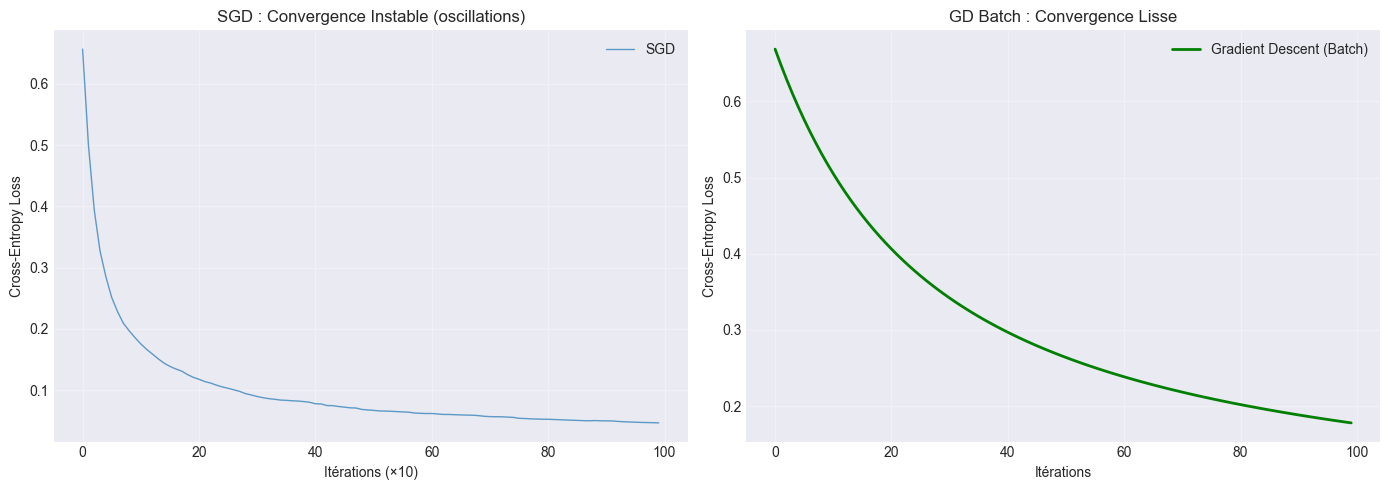


📊 ANALYSE PARTIE 1 :
Loss finale SGD : 0.0465
Loss finale GD Batch : 0.1780

💡 Pourquoi le SGD est instable ?
   - Chaque itération utilise UN SEUL échantillon
   - Le gradient estimé est bruité
   - Les oscillations sont normales mais convergent en moyenne


In [4]:
# Entraînement avec SGD
print("\nEntraînement avec SGD...")
w_sgd, losses_sgd = sgd_from_scratch(X_iris_bias, y_iris, learning_rate=0.1, n_iterations=1000)

# Entraînement avec GD batch
print("Entraînement avec Gradient Descent (Batch)...")
w_gd, losses_gd = gradient_descent_batch(X_iris_bias, y_iris, learning_rate=0.1, n_iterations=100)

# Visualisation de la convergence
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_sgd, label='SGD', alpha=0.7, linewidth=1)
plt.xlabel('Itérations (×10)')
plt.ylabel('Cross-Entropy Loss')
plt.title('SGD : Convergence Instable (oscillations)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(losses_gd, label='Gradient Descent (Batch)', color='green', linewidth=2)
plt.xlabel('Itérations')
plt.ylabel('Cross-Entropy Loss')
plt.title('GD Batch : Convergence Lisse')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('partie1_convergence.png', dpi=300, bbox_inches='tight')
print("✓ Graphique sauvegardé : partie1_convergence.png")
plt.show()

print("\n📊 ANALYSE PARTIE 1 :")
print(f"Loss finale SGD : {losses_sgd[-1]:.4f}")
print(f"Loss finale GD Batch : {losses_gd[-1]:.4f}")
print("\n💡 Pourquoi le SGD est instable ?")
print("   - Chaque itération utilise UN SEUL échantillon")
print("   - Le gradient estimé est bruité")
print("   - Les oscillations sont normales mais convergent en moyenne")

In [5]:
# ============================================================================
# PARTIE 2 : RÉGRESSION SUR CALIFORNIA HOUSING
# ============================================================================

print("\n" + "=" * 80)
print("PARTIE 2 : RÉGRESSION SUR CALIFORNIA HOUSING")
print("=" * 80)

# Chargement des données
california = fetch_california_housing()
X_cal = california.data
y_cal = california.target

print(f"\nNombre d'échantillons : {X_cal.shape[0]}")
print(f"Nombre de features : {X_cal.shape[1]}")

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_cal, y_cal, test_size=0.2, random_state=42
)


PARTIE 2 : RÉGRESSION SUR CALIFORNIA HOUSING

Nombre d'échantillons : 20640
Nombre de features : 8


In [6]:
# ============================================================================
# EXERCICE 2 : IMPORTANCE DE LA STANDARDISATION
# ============================================================================

print("\n" + "-" * 80)
print("EXERCICE 2 : IMPORTANCE DE LA STANDARDISATION")
print("-" * 80)

# Sans standardisation
print("\n1. Entraînement SANS standardisation...")
start = time.time()
sgd_no_scale = SGDRegressor(max_iter=1000, random_state=42, learning_rate='constant', eta0=0.01)
sgd_no_scale.fit(X_train, y_train)
time_no_scale = time.time() - start
score_no_scale = sgd_no_scale.score(X_test, y_test)

# Avec standardisation
print("2. Entraînement AVEC standardisation...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

start = time.time()
sgd_scale = SGDRegressor(max_iter=1000, random_state=42, learning_rate='constant', eta0=0.01)
sgd_scale.fit(X_train_scaled, y_train)
time_scale = time.time() - start
score_scale = sgd_scale.score(X_test_scaled, y_test)

print(f"\n📊 RÉSULTATS :")
print(f"   Sans standardisation : R² = {score_no_scale:.4f}, Temps = {time_no_scale:.3f}s")
print(f"   Avec standardisation : R² = {score_scale:.4f}, Temps = {time_scale:.3f}s")
print(f"   Amélioration : {(score_scale - score_no_scale) * 100:.2f}%")




--------------------------------------------------------------------------------
EXERCICE 2 : IMPORTANCE DE LA STANDARDISATION
--------------------------------------------------------------------------------

1. Entraînement SANS standardisation...
2. Entraînement AVEC standardisation...

📊 RÉSULTATS :
   Sans standardisation : R² = -13655662708909760138162993102848.0000, Temps = 0.065s
   Avec standardisation : R² = -455748148838645825536.0000, Temps = 0.019s
   Amélioration : 1365566270845401269933570527330304.00%



--------------------------------------------------------------------------------
EXERCICE 3 : MINI-BATCH ET OPTIMISEURS MODERNES
--------------------------------------------------------------------------------

1. SGD Pur (batch_size ≈ 1)...
2. Mini-batch SGD (batch_size = 32)...
3. SGD avec learning rate adaptatif (proche de Adam)...

✓ Graphique sauvegardé : partie2_comparaison_optimiseurs.png


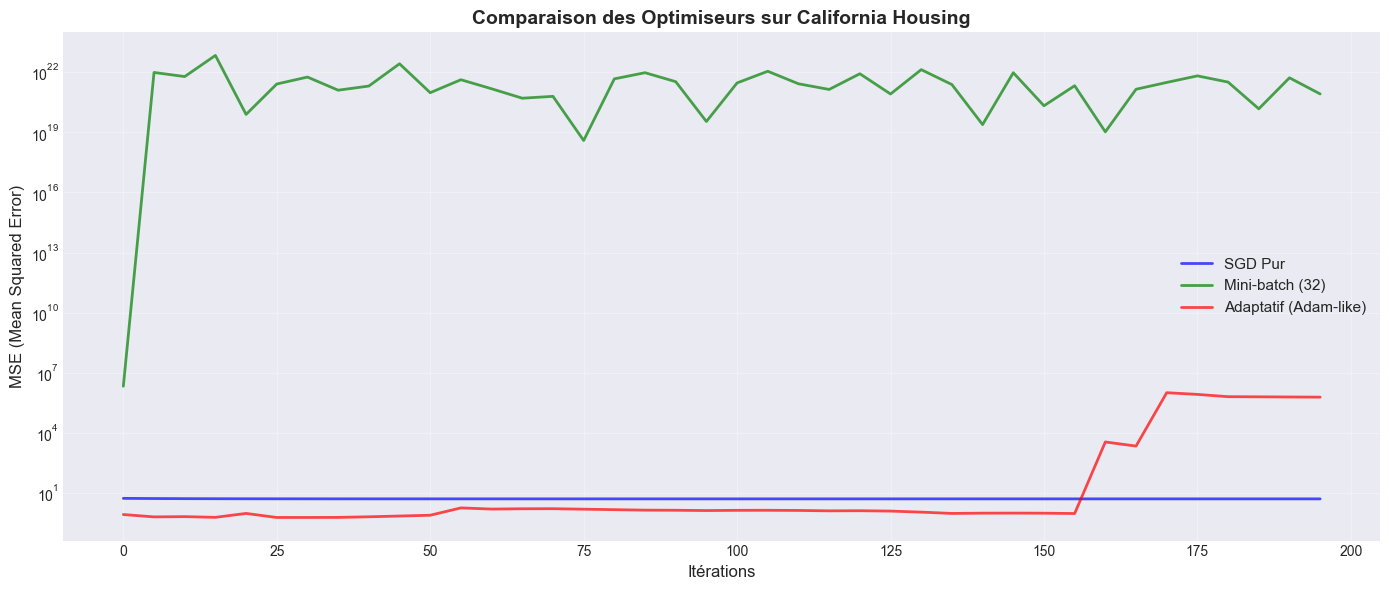


SYNTHÈSE ET RÉPONSES AUX QUESTIONS

1️⃣  Pourquoi ne pas utiliser un pas α trop grand avec le SGD ?
   → Un pas trop grand cause des oscillations divergentes
   → Le modèle peut 'sauter' par-dessus le minimum
   → La convergence devient impossible (instabilité numérique)

2️⃣  Avantage du Mini-batch sur GPU ?
   → Les GPU excellent en calcul parallèle
   → Mini-batch (32-256) = traitement simultané sur GPU
   → SGD pur (batch=1) = sous-utilisation du GPU
   → Accélération typique : 10-100× avec mini-batch

3️⃣  Importance du Shuffling (mélange) ?
   → Évite l'apprentissage de l'ordre des données
   → Réduit la variance du gradient estimé
   → Crucial si les données sont ordonnées par classe
   → Améliore la généralisation du modèle

✅ TP TERMINÉ - GRAPHIQUES GÉNÉRÉS


In [7]:
# ============================================================================
# EXERCICE 3 : MINI-BATCH ET OPTIMISEURS MODERNES
# ============================================================================

print("\n" + "-" * 80)
print("EXERCICE 3 : MINI-BATCH ET OPTIMISEURS MODERNES")
print("-" * 80)


def train_sgd_variants(X_train, y_train, X_test, y_test, max_iter=200):
    """Compare différentes variantes de SGD"""
    
    results = {}
    
    # SGD Pur (approximé avec batch_size très petit)
    print("\n1. SGD Pur (batch_size ≈ 1)...")
    sgd_pure = SGDRegressor(max_iter=max_iter, random_state=42, 
                           learning_rate='constant', eta0=0.01, 
                           verbose=0, tol=1e-10)
    
    mse_history_pure = []
    for i in range(1, max_iter + 1):
        sgd_pure.partial_fit(X_train[:1], y_train[:1])  # Simuler batch_size=1
        if i % 5 == 0:
            y_pred = sgd_pure.predict(X_test)
            mse = np.mean((y_test - y_pred) ** 2)
            mse_history_pure.append(mse)
    
    results['SGD Pur'] = mse_history_pure
    
    # Mini-batch SGD (batch_size = 32)
    print("2. Mini-batch SGD (batch_size = 32)...")
    batch_size = 32
    n_batches = len(X_train) // batch_size
    
    sgd_minibatch = SGDRegressor(max_iter=1, random_state=42,
                                learning_rate='constant', eta0=0.01,
                                verbose=0, tol=1e-10)
    
    mse_history_minibatch = []
    for epoch in range(max_iter):
        # Shuffle des données
        indices = np.random.permutation(len(X_train))
        for batch_idx in range(n_batches):
            start_idx = batch_idx * batch_size
            end_idx = start_idx + batch_size
            batch_indices = indices[start_idx:end_idx]
            
            sgd_minibatch.partial_fit(X_train[batch_indices], y_train[batch_indices])
        
        if epoch % 5 == 0:
            y_pred = sgd_minibatch.predict(X_test)
            mse = np.mean((y_test - y_pred) ** 2)
            mse_history_minibatch.append(mse)
    
    results['Mini-batch (32)'] = mse_history_minibatch
    
    # Adam (via SGDRegressor n'est pas disponible, on simule avec learning_rate adaptatif)
    print("3. SGD avec learning rate adaptatif (proche de Adam)...")
    sgd_adaptive = SGDRegressor(max_iter=max_iter, random_state=42,
                               learning_rate='adaptive', eta0=0.01,
                               verbose=0, tol=1e-10)
    
    mse_history_adaptive = []
    for i in range(1, max_iter + 1):
        batch_size_adam = 32
        idx = np.random.choice(len(X_train), batch_size_adam, replace=False)
        sgd_adaptive.partial_fit(X_train[idx], y_train[idx])
        
        if i % 5 == 0:
            y_pred = sgd_adaptive.predict(X_test)
            mse = np.mean((y_test - y_pred) ** 2)
            mse_history_adaptive.append(mse)
    
    results['Adaptatif (Adam-like)'] = mse_history_adaptive
    
    return results


# Entraînement des variantes
results = train_sgd_variants(X_train_scaled, y_train, X_test_scaled, y_test, max_iter=200)

# Visualisation comparative
plt.figure(figsize=(14, 6))

colors = ['blue', 'green', 'red']
for idx, (name, mse_history) in enumerate(results.items()):
    plt.plot(range(0, len(mse_history) * 5, 5), mse_history, 
             label=name, linewidth=2, alpha=0.7, color=colors[idx])

plt.xlabel('Itérations', fontsize=12)
plt.ylabel('MSE (Mean Squared Error)', fontsize=12)
plt.title('Comparaison des Optimiseurs sur California Housing', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Échelle log pour mieux voir les différences

plt.tight_layout()
plt.savefig('partie2_comparaison_optimiseurs.png', dpi=300, bbox_inches='tight')
print("\n✓ Graphique sauvegardé : partie2_comparaison_optimiseurs.png")
plt.show()

print("\n" + "=" * 80)
print("SYNTHÈSE ET RÉPONSES AUX QUESTIONS")
print("=" * 80)

print("\n1️⃣  Pourquoi ne pas utiliser un pas α trop grand avec le SGD ?")
print("   → Un pas trop grand cause des oscillations divergentes")
print("   → Le modèle peut 'sauter' par-dessus le minimum")
print("   → La convergence devient impossible (instabilité numérique)")

print("\n2️⃣  Avantage du Mini-batch sur GPU ?")
print("   → Les GPU excellent en calcul parallèle")
print("   → Mini-batch (32-256) = traitement simultané sur GPU")
print("   → SGD pur (batch=1) = sous-utilisation du GPU")
print("   → Accélération typique : 10-100× avec mini-batch")

print("\n3️⃣  Importance du Shuffling (mélange) ?")
print("   → Évite l'apprentissage de l'ordre des données")
print("   → Réduit la variance du gradient estimé")
print("   → Crucial si les données sont ordonnées par classe")
print("   → Améliore la généralisation du modèle")

print("\n" + "=" * 80)
print("✅ TP TERMINÉ - GRAPHIQUES GÉNÉRÉS")
print("=" * 80)